# Logistische Regression
Klassifikation von Verkehrsteilnehmern (Pkw, Fußgänger, Fahrradfahrer)

In [1]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# Todo: Load data to DataFrame
data = pd.read_csv('Car_Ped_Bic_Class.csv')
data.head(15)

,Velocity,Weight,Class
0,4.596708,55.688821,Pedestrian
1,0.510831,45.153992,Pedestrian
2,1.281898,101.899550,Pedestrian
3,3.874816,46.065996,Pedestrian
4,0.003699,67.035412,Pedestrian
5,2.141317,78.730134,Pedestrian
6,0.816205,99.153828,Pedestrian
7,0.293225,73.811908,Pedestrian
8,1.724872,51.298558,Pedestrian
9,4.416819,89.015390,Pedestrian


In [3]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Velocity,Weight,Class
0,63.621414,788.795675,Car
1,43.624909,881.681709,Car
2,4.672300,97.446488,Pedestrian
3,4.865817,101.162972,Pedestrian
4,55.662064,621.293133,Car


In [4]:
# Classes
data['Class'].unique()

array(['Car', 'Pedestrian', 'Bicycle'], dtype=object)

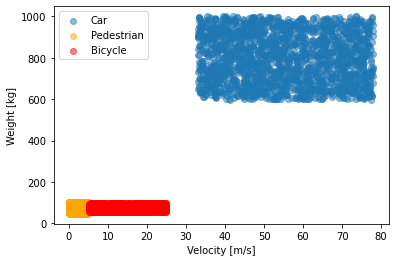

In [5]:
# Plot data

cars = data[data['Class']=='Car']
pedest = data[data['Class']=='Pedestrian']
bicycle = data[data['Class']=='Bicycle']

plt.scatter(cars['Velocity'], cars['Weight'], alpha=0.5)
plt.scatter(pedest['Velocity'], pedest['Weight'], alpha=0.5, c='orange')
plt.scatter(bicycle['Velocity'], bicycle['Weight'], alpha=0.5, c='red')
    
plt.legend(['Car', 'Pedestrian', 'Bicycle'])

plt.xlabel('Velocity [m/s]')
plt.ylabel('Weight [kg]') 

plt.show()

Zuordnung zur Klasse "Car" dann, wenn "Weight" > 400 kg<br>
Weitere Modellbildung nur für die zwei Klassen "Pedestrian" und "Bicycle"

In [6]:
data_sub = data[data['Class']!='Car']
data_sub = data_sub.reset_index(drop=True)
print(len(data_sub))
data_sub

4000


,Velocity,Weight,Class
0,4.672300,97.446488,Pedestrian
1,4.865817,101.162972,Pedestrian
2,3.035397,74.657894,Pedestrian
3,17.131638,67.016053,Bicycle
4,0.905405,91.518544,Pedestrian
...,...,...,...
3995,4.181663,75.067983,Pedestrian
3996,2.236213,97.546111,Pedestrian
3997,2.525199,78.044321,Pedestrian
3998,20.965870,97.565691,Bicycle


### Datenbereinigung

In [7]:
# Todo: Check for NaNs and remove them if any
data_sub.isnull().sum()

Velocity    0
Weight      0
Class       0
dtype: int64

### Datenaufbereitung

In [8]:
# Todo: Assign input features to variable X
X = data_sub[['Weight','Velocity']]
X

,Weight,Velocity
0,97.446488,4.672300
1,101.162972,4.865817
2,74.657894,3.035397
3,67.016053,17.131638
4,91.518544,0.905405
...,...,...
3995,75.067983,4.181663
3996,97.546111,2.236213
3997,78.044321,2.525199
3998,97.565691,20.965870


In [9]:
# Todo: Assign class labels to variable y
y = data_sub['Class']

y = pd.Series([0 if d=='Pedestrian' else 1 for d in data_sub['Class']])
y

0       0
1       0
2       0
3       1
4       0
       ..
3995    0
3996    0
3997    0
3998    1
3999    0
Length: 4000, dtype: int64

In [10]:
y.unique()

array([0, 1], dtype=int64)

### Modellierung

In [11]:
# Todo: Create a logistic regression model
import statsmodels.api as sm

log_reg = sm.Logit(y, X)

C:\Users\anne.stockem-novo\Anaconda3\envs\kiec22\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [12]:
# Todo: Fit logistic regression model
log_reg = log_reg.fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.101842
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.8531
Time:                        11:20:16   Log-Likelihood:                -407.37
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Weight        -0.1285      0.006    -20.594      0.000      -0.141      -0.116
Velocity       1.6844      0.085     19.739      0.000       1.517       1.852
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
# Todo: Make predictions on X (and get class assignments!)
y_pred = log_reg.predict(X)
y_pred_class = pd.Series([1 if p>0.5 else 0 for p in y_pred])

In [14]:
# Todo: Print accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
accuracy_score(y, y_pred_class)
precision_score(y, y_pred_class)

0.946950917203768

In [15]:
# Todo: Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cfn_mat = confusion_matrix(y, y_pred_class)
print("confusion matrix: \n", cfn_mat)

confusion matrix: 
 [[1893  107]
 [  90 1910]]


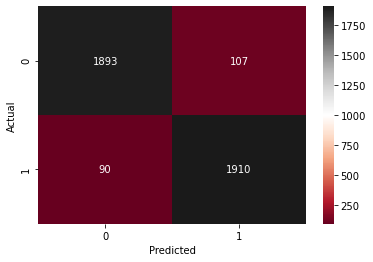

In [16]:
# Display confusion matrix with seaborn
import seaborn as sns
sns.heatmap(cfn_mat, annot=True, fmt='d', cmap="RdGy")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Print classification report
print(classification_report(y, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2000
           1       0.95      0.95      0.95      2000

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

